深度卷积神经网络（AlexNet）

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
net = nn.Sequential(
    # 这里使用11*11的更大窗口来捕获对象
    # 同时步幅为4，减少输出的高度和宽度
    # 另外，输出通道的数量远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，填充大小为2，使得输入输出高宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口
    # 除了最后一层，输出通道的数量进一步增加。
    # 在前面两个卷积层之后，汇聚层不用与减少输入的宽度和高度
    nn.Conv2d(256, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 全连接层是lenet的好几倍，使用dropout来减少过拟合
    nn.Linear(6400, 4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 输出层，分10类，因为用的Fashion-MNIST
    nn.Linear(4096, 10)
                   )

我们构造一个单通道数据，来观察每一层输出的形状。

In [3]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, ' output shape: \t', X.shape)

Conv2d  output shape: 	 torch.Size([1, 96, 54, 54])
ReLU  output shape: 	 torch.Size([1, 96, 54, 54])
MaxPool2d  output shape: 	 torch.Size([1, 96, 26, 26])
Conv2d  output shape: 	 torch.Size([1, 256, 26, 26])
ReLU  output shape: 	 torch.Size([1, 256, 26, 26])
MaxPool2d  output shape: 	 torch.Size([1, 256, 12, 12])
Conv2d  output shape: 	 torch.Size([1, 384, 12, 12])
ReLU  output shape: 	 torch.Size([1, 384, 12, 12])
Conv2d  output shape: 	 torch.Size([1, 384, 12, 12])
ReLU  output shape: 	 torch.Size([1, 384, 12, 12])
Conv2d  output shape: 	 torch.Size([1, 256, 12, 12])
ReLU  output shape: 	 torch.Size([1, 256, 12, 12])
MaxPool2d  output shape: 	 torch.Size([1, 256, 5, 5])
Flatten  output shape: 	 torch.Size([1, 6400])
Linear  output shape: 	 torch.Size([1, 4096])
ReLU  output shape: 	 torch.Size([1, 4096])
Dropout  output shape: 	 torch.Size([1, 4096])
Linear  output shape: 	 torch.Size([1, 4096])
ReLU  output shape: 	 torch.Size([1, 4096])
Dropout  output shape: 	 torch.Size([1, 409

Fashion-MNIST图像分辨率低于ImageNet图像，我们将它们增加到224x224

In [4]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:16<00:00, 1559386.40it/s]


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 110889.26it/s]


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:03<00:00, 1261829.21it/s]


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 5145919.21it/s]

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



训练AlexNet

loss 0.327, train acc 0.881, test acc 0.881
2780.1 examples/sec on cuda:0


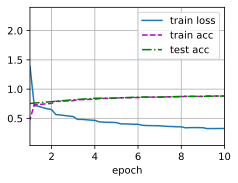

In [5]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())